In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# =========================
# Load all FAH sheets
# =========================
xls = pd.ExcelFile("../Appendix B (shares).xls")

sheets = {
    "1994-98": "94-98 FAH",
    "2003-04": "03-04 FAH",
    "2005-06": "05-06 FAH",
    "2007-08": "07-08 FAH"
}

# Fruits and Dairy lists
fruits = [p.lower() for p in [
    "Apples as fruit", "Bananas", "Berries", "Grapes",
    "Melons", "Oranges, Total", "Other citrus fruit",
    "Stone fruit", "Tropical fruit"
]]

dairy = [p.lower() for p in [
    "Fluid Milk, Total", "Butter", "Cheese", "Yogurt", "Dairy, Other"
]]



In [69]:
def extract_data(sheet_name, group="Men"):
    df = pd.read_excel(xls, sheet_name=sheet_name, header=None)
    col_map = {"Boys": 1, "Girls": 4, "Men": 7, "Women": 10}

    if group not in col_map: 
        raise ValueError("Group must be one of: Boys, Girls, Men, Women")

    sub = df.iloc[77:, [0, col_map[group]]]
    sub.columns = ["Product", "Mean"]

    # Normalize names
    sub["Product"] = sub["Product"].astype(str).str.strip().str.lower()
    sub = sub.dropna()

    sub = sub.drop_duplicates(subset=["Product"], keep="first")
    sub = sub.reset_index(drop=True)

    return sub




In [71]:
def build_dataset(group, product_list):
    records = {}
    normalized_list = [p.lower() for p in product_list]  # lowercase lookup list

    for period, sheet in sheets.items():
        extracted = extract_data(sheet, group=group)
        extracted = extracted[extracted["Product"].isin(product_list)]
        records[period] = extracted.set_index("Product")["Mean"]

    df_all = pd.DataFrame(records)

    # Keep only products that actually exist
    df_all = df_all.loc[df_all.index.intersection(product_list)]

    df_all = df_all[~df_all.index.duplicated(keep="first")]

    return df_all

men_fruits = build_dataset("Men", fruits)
women_fruits = build_dataset("Women", fruits)
men_dairy = build_dataset("Men", dairy)
women_dairy = build_dataset("Women", dairy)


In [72]:
# For debugging purposes
print("Men Fruits:", men_fruits.index.tolist()) 
print("Women Fruits:", women_fruits.index.tolist()) 
print("Men Dairy:", men_dairy.index.tolist()) 
print("Women Dairy:", women_dairy.index.tolist())



Men Fruits: ['apples as fruit', 'bananas', 'berries', 'grapes', 'melons', 'oranges, total', 'other citrus fruit', 'stone fruit', 'tropical fruit']
Women Fruits: ['apples as fruit', 'bananas', 'berries', 'grapes', 'melons', 'oranges, total', 'other citrus fruit', 'stone fruit', 'tropical fruit']
Men Dairy: ['fluid milk, total', 'butter', 'cheese', 'yogurt', 'dairy, other']
Women Dairy: ['fluid milk, total', 'butter', 'cheese', 'yogurt', 'dairy, other']


In [73]:
# Plot function
def plot_lines(df, title, ylabel, filename): 
    plt.figure(figsize=(10,6)) 
    for product in df.index: 
        plt.plot(df.columns, df.loc[product], marker="o", label=product) 
    plt.title(title) 
    plt.xlabel("Time Period") 
    plt.ylabel(ylabel) 
    plt.legend() 
    plt.figtext(0.5, -0.05, 
            "Source: USDA ERS, U.S. Food Commodity Availability, Appendix B\n" 
            "https://www.ers.usda.gov/publications/pub-details/?pubid=81817", 
            wrap=True, ha='center', fontsize=8)
    plt.tight_layout() 
    plt.savefig(filename, bbox_inches="tight") 
    plt.show()


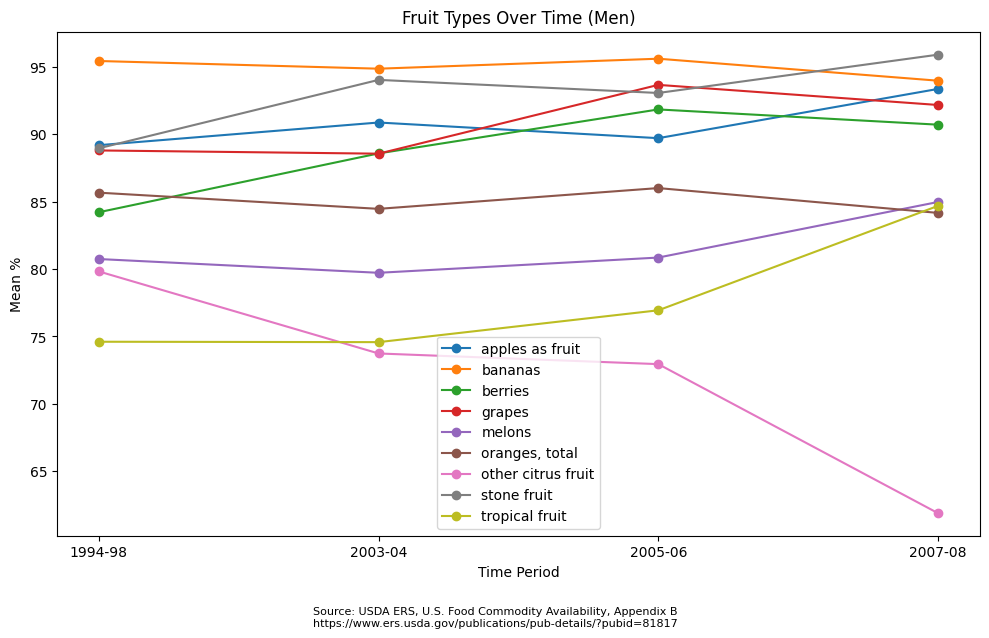

In [79]:
# Plots display
plot_lines(men_fruits, "Fruit Types Over Time (Men)", "Mean %", "men_fruits.png") 


In this figure we can see that the other citrus fruits consumption decreased for men over time compare to women.

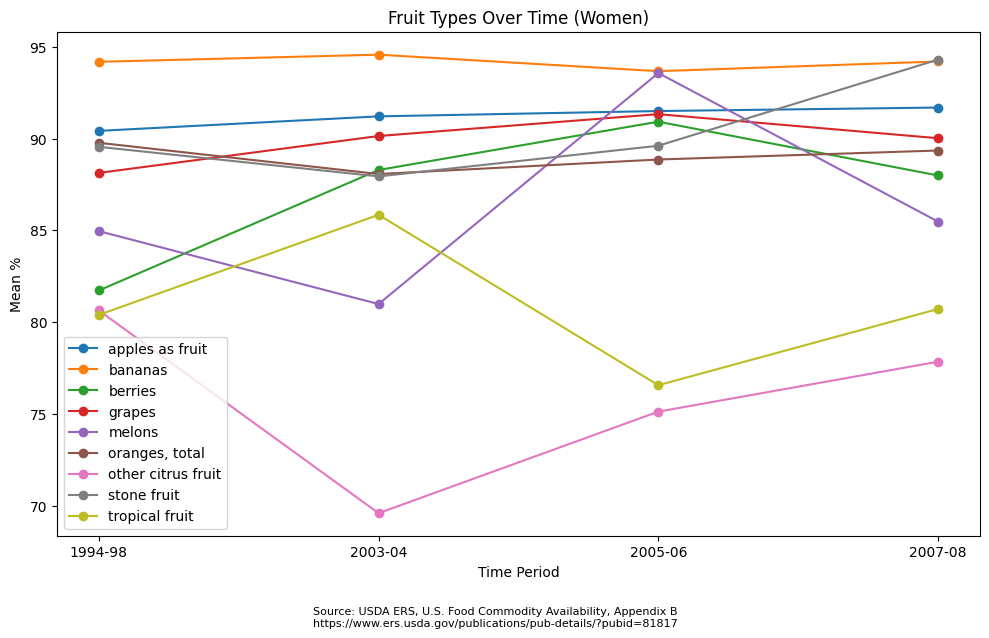

In [80]:
plot_lines(women_fruits, "Fruit Types Over Time (Women)", "Mean %", "women_fruits.png") 


Most fruits have a consumption mean above 80%, but other citrus fruits remain the lowest for both genders. According to the report, 
berries consumption increased over time because the availability increased.

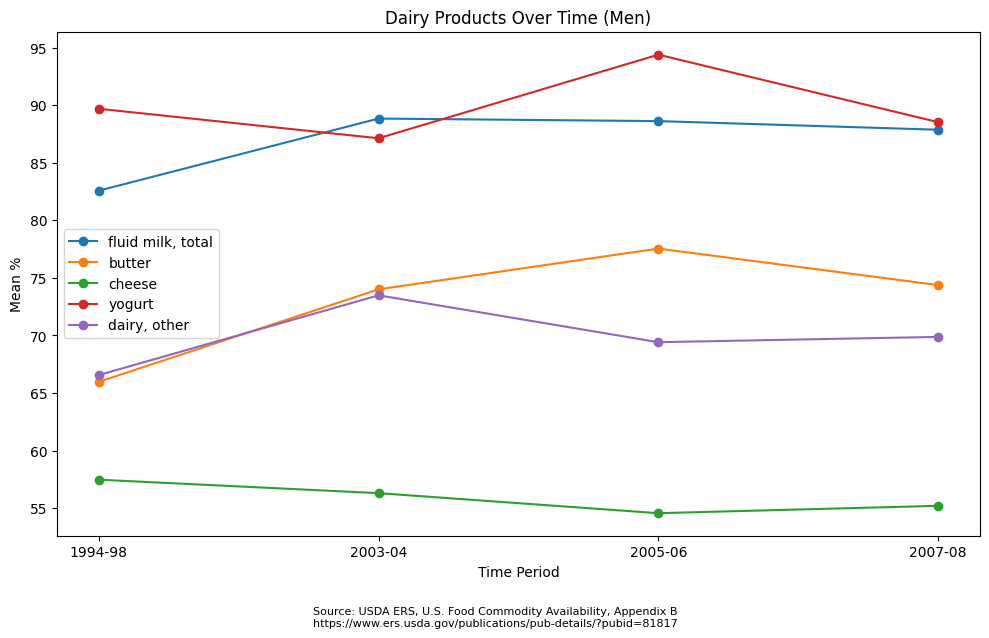

In [81]:
plot_lines(men_dairy, "Dairy Products Over Time (Men)", "Mean %", "men_dairy.png") 


In this chart can be seen that men consume more yogurt than milk over the years, except on 2003-04.

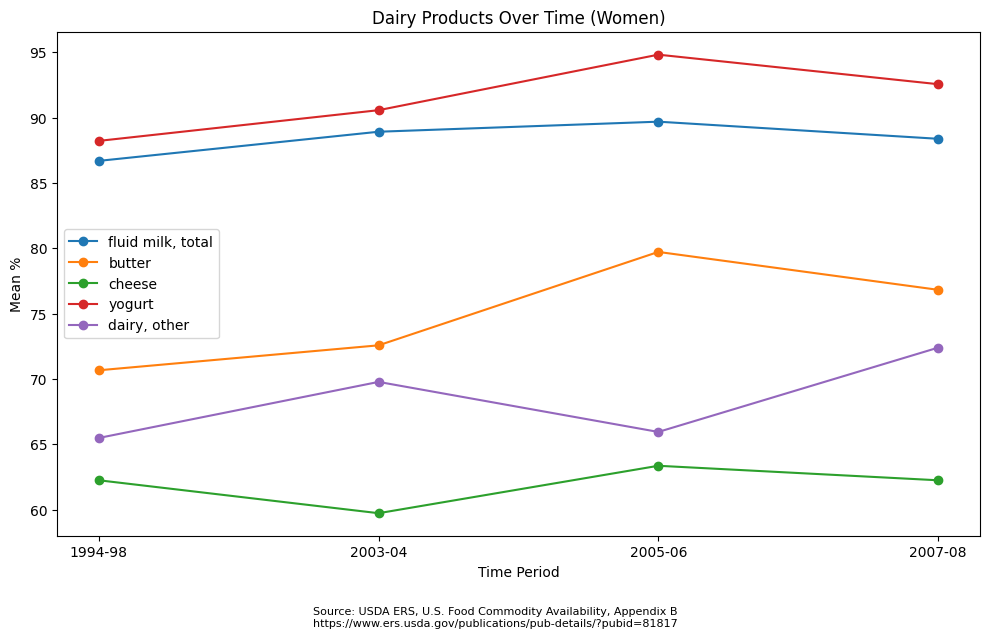

In [82]:
plot_lines(women_dairy, "Dairy Products Over Time (Women)", "Mean %", "women_dairy.png")

In this chart we can see that women's dairy consumption is constant, and non of the dairy products overlap. 